In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
from citipy import citipy
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=105b7864620dd447e068fa2e035fde71


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')\
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | luanda
Processing Record 2 of Set 1 | krugersdorp
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | paidha
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | bima
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | waw
Processing Record 10 of Set 1 | meyungs
City not found. Skipping...
Processing Record 11 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | kuching
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | strezhevoy
Processing Record 16 of Set 1 | havelock
Processing Record 17 of Set 1 | santa rosa
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | rundu
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | kapaa
Processi

Processing Record 35 of Set 4 | prince rupert
Processing Record 36 of Set 4 | port elizabeth
Processing Record 37 of Set 4 | magrath
Processing Record 38 of Set 4 | phan thiet
Processing Record 39 of Set 4 | kisangani
Processing Record 40 of Set 4 | natal
Processing Record 41 of Set 4 | saint-augustin
Processing Record 42 of Set 4 | ust-kuyga
Processing Record 43 of Set 4 | sorso
Processing Record 44 of Set 4 | bikin
Processing Record 45 of Set 4 | pudozh
Processing Record 46 of Set 4 | tatarsk
Processing Record 47 of Set 4 | tadine
Processing Record 48 of Set 4 | kuche
City not found. Skipping...
Processing Record 49 of Set 4 | sabang
Processing Record 50 of Set 4 | camacari
Processing Record 1 of Set 5 | hailar
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | pendleton
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | codrington
Processing Record 6 of Set 5 | tateyama
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 |

Processing Record 26 of Set 8 | banda aceh
Processing Record 27 of Set 8 | grand gaube
Processing Record 28 of Set 8 | guarapari
Processing Record 29 of Set 8 | jasper
Processing Record 30 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 31 of Set 8 | luderitz
Processing Record 32 of Set 8 | urumqi
Processing Record 33 of Set 8 | muheza
Processing Record 34 of Set 8 | lagoa
Processing Record 35 of Set 8 | richards bay
Processing Record 36 of Set 8 | khorixas
Processing Record 37 of Set 8 | lorengau
Processing Record 38 of Set 8 | san ramon
Processing Record 39 of Set 8 | jishou
Processing Record 40 of Set 8 | ancud
Processing Record 41 of Set 8 | omboue
Processing Record 42 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 44 of Set 8 | san luis
Processing Record 45 of Set 8 | synya
Processing Record 46 of Set 8 | gizo
Processing Record 47 of Set 8 | bowen
Processing Reco

Processing Record 13 of Set 12 | dunedin
Processing Record 14 of Set 12 | hofn
Processing Record 15 of Set 12 | boca do acre
Processing Record 16 of Set 12 | geraldton
Processing Record 17 of Set 12 | kholodnyy
Processing Record 18 of Set 12 | tucuman
Processing Record 19 of Set 12 | young
Processing Record 20 of Set 12 | moranbah
Processing Record 21 of Set 12 | vestmannaeyjar
Processing Record 22 of Set 12 | payakumbuh
Processing Record 23 of Set 12 | port hawkesbury
Processing Record 24 of Set 12 | zhuhai
Processing Record 25 of Set 12 | marcona
City not found. Skipping...
Processing Record 26 of Set 12 | atlantis
Processing Record 27 of Set 12 | luyang
Processing Record 28 of Set 12 | calog
City not found. Skipping...
Processing Record 29 of Set 12 | woodward
Processing Record 30 of Set 12 | martaban
Processing Record 31 of Set 12 | terney
Processing Record 32 of Set 12 | alexandroupoli
Processing Record 33 of Set 12 | half moon bay
Processing Record 34 of Set 12 | orsha
Processing

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luanda,-8.8368,13.2343,77.00,83,0,6.91,AO,2021-06-02 19:23:55
1,Krugersdorp,-26.0858,27.7752,47.75,44,53,3.78,ZA,2021-06-02 19:26:56
2,Dingle,10.9995,122.6711,76.89,91,100,5.26,PH,2021-06-02 19:26:56
3,Paidha,2.4167,30.9855,64.29,79,100,5.75,UG,2021-06-02 19:26:57
4,Butaritari,3.0707,172.7902,82.94,78,100,15.52,KI,2021-06-02 19:25:06
5,Bima,-8.4667,118.7167,74.25,93,6,3.42,ID,2021-06-02 19:26:57
6,Hilo,19.7297,-155.0900,77.79,78,90,3.44,US,2021-06-02 19:22:29
7,Waw,7.7029,27.9953,79.57,65,100,3.76,SS,2021-06-02 19:26:58
8,Busselton,-33.6500,115.3333,60.03,68,100,3.00,AU,2021-06-02 19:26:58
9,Kuching,1.5500,110.3333,79.02,89,40,3.44,MY,2021-06-02 19:26:59


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luanda,AO,2021-06-02 19:23:55,-8.8368,13.2343,77.00,83,0,6.91
1,Krugersdorp,ZA,2021-06-02 19:26:56,-26.0858,27.7752,47.75,44,53,3.78
2,Dingle,PH,2021-06-02 19:26:56,10.9995,122.6711,76.89,91,100,5.26
3,Paidha,UG,2021-06-02 19:26:57,2.4167,30.9855,64.29,79,100,5.75
4,Butaritari,KI,2021-06-02 19:25:06,3.0707,172.7902,82.94,78,100,15.52
5,Bima,ID,2021-06-02 19:26:57,-8.4667,118.7167,74.25,93,6,3.42
6,Hilo,US,2021-06-02 19:22:29,19.7297,-155.0900,77.79,78,90,3.44
7,Waw,SS,2021-06-02 19:26:58,7.7029,27.9953,79.57,65,100,3.76
8,Busselton,AU,2021-06-02 19:26:58,-33.6500,115.3333,60.03,68,100,3.00
9,Kuching,MY,2021-06-02 19:26:59,1.5500,110.3333,79.02,89,40,3.44


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

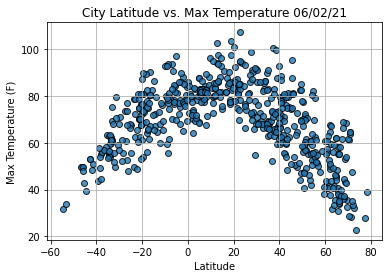

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

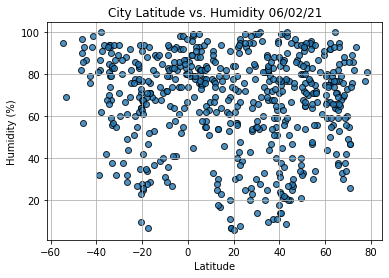

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

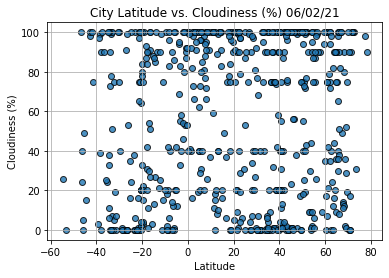

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

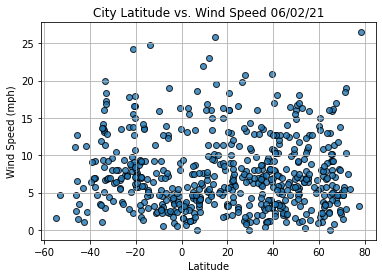

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Dingle,PH,2021-06-02 19:26:56,10.9995,122.6711,76.89,91,100,5.26
3,Paidha,UG,2021-06-02 19:26:57,2.4167,30.9855,64.29,79,100,5.75
4,Butaritari,KI,2021-06-02 19:25:06,3.0707,172.7902,82.94,78,100,15.52
6,Hilo,US,2021-06-02 19:22:29,19.7297,-155.0900,77.79,78,90,3.44
7,Waw,SS,2021-06-02 19:26:58,7.7029,27.9953,79.57,65,100,3.76


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

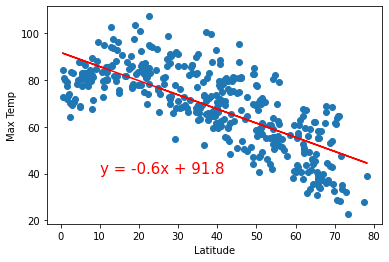

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

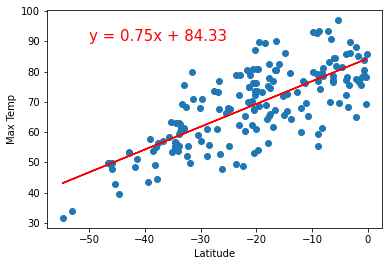

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

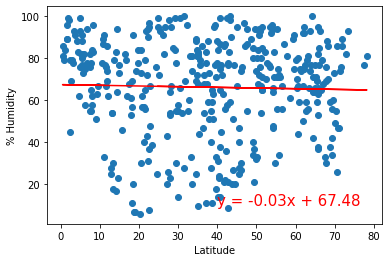

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

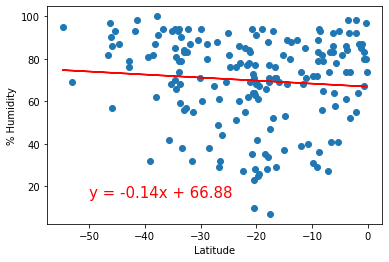

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

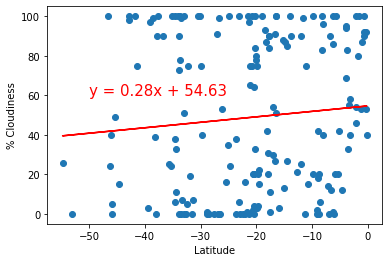

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

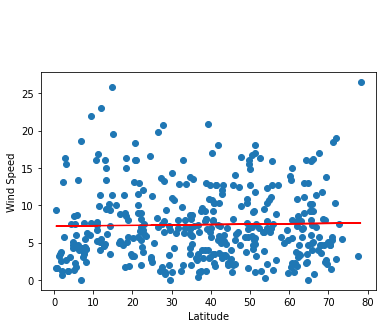

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

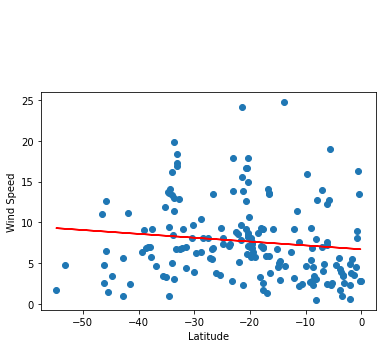

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

In [28]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [29]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Luanda,AO,2021-06-02 19:23:55,-8.8368,13.2343,77.00,83,0,6.91
1,1,Krugersdorp,ZA,2021-06-02 19:26:56,-26.0858,27.7752,47.75,44,53,3.78
2,2,Dingle,PH,2021-06-02 19:26:56,10.9995,122.6711,76.89,91,100,5.26
3,3,Paidha,UG,2021-06-02 19:26:57,2.4167,30.9855,64.29,79,100,5.75
4,4,Butaritari,KI,2021-06-02 19:25:06,3.0707,172.7902,82.94,78,100,15.52


In [30]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [31]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [34]:
heat_layer = gmaps.heatmap_layer(locations, weights=temps)

In [35]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [36]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

In [37]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [39]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Luanda,AO,2021-06-02 19:23:55,-8.8368,13.2343,77.00,83,0,6.91
2,2,Dingle,PH,2021-06-02 19:26:56,10.9995,122.6711,76.89,91,100,5.26
4,4,Butaritari,KI,2021-06-02 19:25:06,3.0707,172.7902,82.94,78,100,15.52
6,6,Hilo,US,2021-06-02 19:22:29,19.7297,-155.0900,77.79,78,90,3.44
7,7,Waw,SS,2021-06-02 19:26:58,7.7029,27.9953,79.57,65,100,3.76
9,9,Kuching,MY,2021-06-02 19:26:59,1.5500,110.3333,79.02,89,40,3.44
12,12,Havelock,US,2021-06-02 19:24:27,34.8791,-76.9013,82.98,81,100,5.99
13,13,Santa Rosa,PH,2021-06-02 19:23:52,14.3122,121.1114,81.91,94,100,7.20
17,17,Kapaa,US,2021-06-02 19:23:50,22.0752,-159.3190,81.12,72,1,1.99
18,18,Atuona,PF,2021-06-02 19:23:52,-9.8000,-139.0333,80.02,72,100,15.93


In [40]:
preferred_cities_df.count()

City_ID       196
City          196
Country       196
Date          196
Lat           196
Lng           196
Max Temp      196
Humidity      196
Cloudiness    196
Wind Speed    196
dtype: int64

In [41]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Luanda,AO,77.00,-8.8368,13.2343,
2,Dingle,PH,76.89,10.9995,122.6711,
4,Butaritari,KI,82.94,3.0707,172.7902,
6,Hilo,US,77.79,19.7297,-155.0900,
7,Waw,SS,79.57,7.7029,27.9953,
9,Kuching,MY,79.02,1.5500,110.3333,
12,Havelock,US,82.98,34.8791,-76.9013,
13,Santa Rosa,PH,81.91,14.3122,121.1114,
17,Kapaa,US,81.12,22.0752,-159.3190,
18,Atuona,PF,80.02,-9.8000,-139.0333,


In [42]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}